In [7]:
## Run the cell below to attempt to programmatically find your crime file
import os,glob

## Getting the home folder from environment variables
home_folder = os.environ['HOME']
# print("- Your Home Folder is: " + home_folder)

## Check for downloads folder
if 'Downloads' in os.listdir(home_folder):
    
    
    # Print the Downloads folder path
    dl_folder = os.path.abspath(os.path.join(home_folder,'Downloads'))
    print(f"- Your Downloads folder is '{dl_folder}/'\n")
    
    ## checking for crime files using glob
    crime_files = sorted(glob.glob(dl_folder+'/**/Crimes_-_2001_to_Present*',recursive=True))
    
    # If more than 
    if len(crime_files)==1:
        RAW_FILE = crime_files[0]
        
    elif len(crime_files)>1:
        print('[i] The following files were found:')
        
        for i, fname in enumerate(crime_files):
            print(f"\tcrime_files[{i}] = '{fname}'")
        print(f'\n- Please fill in the RAW_FILE variable in the code cell below with the correct filepath.')

else:
    print(f'[!] Could not programmatically find your downloads folder.')
    print('- Try using Finder (on Mac) or File Explorer (Windows) to navigate to your Downloads folder.')

- Your Downloads folder is 'C:\Users\Asma\Downloads/'



In [8]:
## DO NOT CHANGE THIS CELL
if RAW_FILE == r"YOUR FILEPATH HERE":
	raise Exception("You must update the RAW_FILE variable in the previous cell to match your local filepath.")
	
RAW_FILE

'C:\\Users\\Asma\\Downloads\\Crimes_-_2001_to_Present.csv'

In [9]:
## (Optional) SET THE FOLDER FOR FINAL FILES
OUTPUT_FOLDER = 'Data/Chicago/'
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

In [10]:
import pandas as pd

chicago_full = pd.read_csv(RAW_FILE)
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7957248,12131776,JD327752,08/10/2020 08:30:00 PM,066XX S SACRAMENTO AVE,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,17.0,66.0,05,1157527.0,1860392.0,2020,08/17/2020 03:41:32 PM,41.772671,-87.698104,"(41.772671069, -87.698104059)"
7957249,12082414,JD269218,06/18/2020 09:00:00 PM,093XX S DR MARTIN LUTHER KING JR DR,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,9.0,49.0,06,1180558.0,1843036.0,2020,06/25/2020 03:41:40 PM,41.724546,-87.614211,"(41.724546436, -87.614210743)"
7957250,12118237,JD311791,07/27/2020 03:02:00 PM,033XX W POLK ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,24.0,27.0,08B,1154169.0,1896171.0,2020,08/03/2020 03:41:51 PM,41.870921,-87.709461,"(41.870920735, -87.709461362)"
7957251,12142591,JD340297,08/14/2020 03:00:00 PM,023XX W ROSEMONT AVE,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,50.0,2.0,07,1159419.0,1941765.0,2020,08/26/2020 03:40:41 PM,41.995927,-87.688929,"(41.995927389, -87.688928533)"


In [11]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Datetime
3981323,3769790,HL141452,01/01/2001 01:00:00 PM,121XX S LOWE AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,...,53.0,06,1174215.0,1824262.0,2001,03/31/2006 10:03:38 PM,41.673171,-87.638000,"(41.673170821, -87.638000169)",2001-01-01 01:00:00
2214132,1313086,G004657,01/01/2001 01:00:00 PM,039XX N DRAKE AV,0810,THEFT,OVER $500,OTHER,False,False,...,NaN,06,1151978.0,1926092.0,2001,08/17/2015 03:03:40 PM,41.953070,-87.716716,"(41.953070112, -87.716715611)",2001-01-01 01:00:00
2194903,1323184,G017467,01/01/2001 01:00:00 PM,102XX S WOOD ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,...,NaN,26,1166196.0,1836771.0,2001,08/17/2015 03:03:40 PM,41.707671,-87.666996,"(41.707671475, -87.666996186)",2001-01-01 01:00:00
2229319,1312658,G004147,01/01/2001 01:00:00 AM,040XX W CORTLAND ST,0460,BATTERY,SIMPLE,STREET,False,False,...,NaN,08B,1149393.0,1912364.0,2001,08/17/2015 03:03:40 PM,41.915450,-87.726575,"(41.915449949, -87.726575474)",2001-01-01 01:00:00
2180779,1311503,G001102,01/01/2001 01:00:00 AM,026XX N HALSTED ST,0264,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,...,NaN,02,1170510.0,1918326.0,2001,08/17/2015 03:03:40 PM,41.931374,-87.648819,"(41.931373805, -87.648818936)",2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172966,13302573,JG533777,12/08/2023 12:00:00 AM,009XX E 40TH ST,0560,ASSAULT,SIMPLE,SIDEWALK,False,True,...,36.0,08A,1183198.0,1878599.0,2023,12/15/2023 03:47:28 PM,41.822074,-87.603435,"(41.822073733, -87.603434976)",2023-12-08 12:00:00
172902,13301440,JG533123,12/08/2023 12:00:00 AM,010XX E 47TH ST,0460,BATTERY,SIMPLE,SCHOOL - PUBLIC BUILDING,False,False,...,39.0,08B,1184079.0,1874062.0,2023,12/15/2023 03:47:28 PM,41.809603,-87.600345,"(41.809603298, -87.600345002)",2023-12-08 12:00:00
172970,13301030,JG532825,12/08/2023 12:00:00 AM,058XX S KOLMAR AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,62.0,08B,1147032.0,1865483.0,2023,12/15/2023 03:47:28 PM,41.786848,-87.736447,"(41.786847889, -87.736446857)",2023-12-08 12:00:00
173491,13301329,JG532987,12/08/2023 12:00:00 AM,028XX S CANAL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,60.0,14,1173646.0,1885941.0,2023,12/15/2023 03:47:28 PM,41.842438,-87.638259,"(41.842438142, -87.638258768)",2023-12-08 12:00:00


In [12]:
chicago_full['Datetime'].dt.year

3981323    2001
2214132    2001
2194903    2001
2229319    2001
2180779    2001
           ... 
172966     2023
172902     2023
172970     2023
173491     2023
173219     2023
Name: Datetime, Length: 7957253, dtype: int64

In [13]:
# save the years for every crime
chicago_full["Year"] = chicago_full['Datetime'].dt.year.astype(str)
chicago_full["Year"].value_counts()

2002    486811
2001    485902
2003    475987
2004    469428
2005    453775
2006    448179
2007    437090
2008    427189
2009    392830
2010    370521
2011    351999
2012    336329
2013    307548
2014    275805
2016    269853
2017    269120
2018    268933
2015    264814
2019    261396
2023    243400
2022    239088
2020    212274
2021    208982
Name: Year, dtype: int64

In [14]:
## Dropping unneeded columns to reduce file size
drop_cols = ["X Coordinate","Y Coordinate", "Community Area","FBI Code",
             "Case Number","Updated On",'Block','Location','IUCR']

In [39]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Year,Latitude,Longitude
Datetime,,,,,,,,,,,,,
2001-01-01 01:00:00,3769790,01/01/2001 01:00:00 PM,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,523,5.0,34.0,2001,41.673171,-87.638000
2001-01-01 01:00:00,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,2001,41.953070,-87.716716
2001-01-01 01:00:00,1323184,01/01/2001 01:00:00 PM,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2213,22.0,NaN,2001,41.707671,-87.666996
2001-01-01 01:00:00,1312658,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,STREET,False,False,2534,25.0,NaN,2001,41.915450,-87.726575
2001-01-01 01:00:00,1311503,01/01/2001 01:00:00 AM,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER DANG WEAPON,BAR OR TAVERN,False,False,1933,19.0,NaN,2001,41.931374,-87.648819
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-08 12:00:00,13302573,12/08/2023 12:00:00 AM,ASSAULT,SIMPLE,SIDEWALK,False,True,214,2.0,4.0,2023,41.822074,-87.603435
2023-12-08 12:00:00,13301440,12/08/2023 12:00:00 AM,BATTERY,SIMPLE,SCHOOL - PUBLIC BUILDING,False,False,222,2.0,4.0,2023,41.809603,-87.600345
2023-12-08 12:00:00,13301030,12/08/2023 12:00:00 AM,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,813,8.0,13.0,2023,41.786848,-87.736447


In [ ]:
# unique # of year bins
year_bins = chicago_final['Year'].astype(str).unique()
year_bins

In [ ]:
FINAL_DROP = ['Year']

In [ ]:
## set save location 

os.makedirs(OUTPUT_FOLDER, exist_ok=True)
print(f"[i] Saving .csv's to {OUTPUT_FOLDER}")
## loop through years
for year in year_bins:
    
    ## save temp slices of dfs to save.
    temp_df = chicago_final.loc[year]
    temp_df = temp_df.sort_index()
    temp_df = temp_df.reset_index(drop=True)
    temp_df = temp_df.drop(columns=FINAL_DROP)

    # save as csv to output folder
    fname_temp = f"{OUTPUT_FOLDER}Chicago-Crime_{year}.csv"#.gz
    temp_df.to_csv(fname_temp,index=False)

    print(f"- Succesfully saved {fname_temp}")

In [ ]:
saved_files = sorted(glob.glob(OUTPUT_FOLDER+'*.*csv'))
saved_files

In [ ]:
## create a README.txt for the zip files
readme = """Source URL: 
- https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2
- Filtered for years 2000-Present.

Downloaded 07/18/2022
- Files are split into 1 year per file.

EXAMPLE USAGE:
>> import glob
>> import pandas as pd
>> folder = "Data/Chicago/"
>> crime_files = sorted(glob.glob(folder+"*.csv"))
>> df = pd.concat([pd.read_csv(f) for f in crime_files])
"""
print(readme)


with open(f"{OUTPUT_FOLDER}README.txt",'w') as f:
    f.write(readme)

In [ ]:
# get list of files from folder
crime_files = sorted(glob.glob(OUTPUT_FOLDER+"*.csv"))
df = pd.concat([pd.read_csv(f, nrows=5) for f in crime_files])
df

In [ ]:
years = df['Date'].map(lambda x: x.split()[0].split('/')[-1])
years.value_counts().sort_index()

1) Comparing Police Districts:
Which district has the most crimes? Which has the least?

In [18]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
df_ts = chicago_final.groupby("District").resample("Y").sum()
df_ts

ID  Arrest  Domestic     Beat  District  \
District Datetime                                                       
1.0      2001-12-31  24302919537    4420       649  1840105   14861.0   
         2002-12-31  40208821903    6226      1383  7609713   17974.0   
         2003-12-31  49739691659    6603      1243  5959056   17571.0   
         2004-12-31  60480353024    6501      1193  6656934   17579.0   
         2005-12-31  73405359944    7224      1115  7540502   17700.0   
...                          ...     ...       ...      ...       ...   
31.0     2019-12-31     83169442       1         0    11491     217.0   
         2020-12-31     48381476       1         1     6614     124.0   
         2021-12-31    186523581       4         2    23569     465.0   
         2022-12-31    178312861       8         0    19859     434.0   
         2023-12-31    183393494       2         0    24651     434.0   

                         Ward       Latitude     Longitude  
District Datetime                                           
1.0      2001-12-31    3337.0  611376.898507 -1.279313e+06  
         2002-12-31  240121.0  729511.040232 -1.526759e+06  
         2003-12-31  313211.0  728794.301662 -1.525269e+06  
         2004-12-31  308895.0  733422.748422 -1.534987e+06  
         2005-12-31  287942.0  733396.753264 -1.534983e+06  
...                       ...            ...           ...  
31.0     2019-12-31     287.0     293.874212 -6.150893e+02  
         2020-12-31     164.0     167.921493 -3.515420e+02  
         2021-12-31     581.0     629.688603 -1.318413e+03  
         2022-12-31     550.0     587.712274 -1.230054e+03  
         2023-12-31     489.0     587.983299 -1.230247e+03  

[530 rows x 8 columns]

In [21]:
df_ts.head().index

MultiIndex([(1.0, '2001-12-31'),
            (1.0, '2002-12-31'),
            (1.0, '2003-12-31'),
            (1.0, '2004-12-31'),
            (1.0, '2005-12-31')],
           names=['District', 'Datetime'])

In [32]:
unstacked = df_ts['District'].unstack(level=0)
unstacked

District,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,16.0,17.0,18.0,19.0,20.0,21.0,22.0,24.0,25.0,31.0
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-12-31,14861.0,70816.0,72939.0,100484.0,100035.0,152928.0,186221.0,250848.0,216828.0,196510.0,...,256288.0,246313.0,405486.0,432421.0,199780.0,NaN,329032.0,362688.0,698275.0,NaN
2002-12-31,17974.0,54096.0,70668.0,103332.0,105480.0,151896.0,196889.0,256800.0,227835.0,194620.0,...,257024.0,245310.0,401670.0,435157.0,183060.0,NaN,344850.0,360504.0,695825.0,279.0
2003-12-31,17571.0,50200.0,70740.0,104584.0,99755.0,152772.0,195055.0,253672.0,227700.0,190860.0,...,254048.0,237592.0,366840.0,408234.0,165240.0,21.0,329142.0,334440.0,709425.0,341.0
2004-12-31,17579.0,47522.0,72834.0,104572.0,102510.0,156654.0,201159.0,251232.0,213309.0,203660.0,...,232368.0,222020.0,363114.0,399779.0,167400.0,63.0,339680.0,345552.0,674800.0,186.0
2005-12-31,17700.0,43922.0,72675.0,99964.0,101860.0,153708.0,192269.0,250832.0,205839.0,192720.0,...,227792.0,223414.0,337698.0,371108.0,174620.0,NaN,332442.0,343776.0,661775.0,155.0
2006-12-31,16952.0,40372.0,70701.0,103964.0,99755.0,150900.0,192395.0,258160.0,211572.0,183160.0,...,228720.0,222071.0,331542.0,358815.0,163600.0,NaN,327008.0,340512.0,621425.0,217.0
2007-12-31,15651.0,38738.0,69348.0,101848.0,104105.0,161982.0,192220.0,248856.0,195480.0,183390.0,...,226480.0,202878.0,326700.0,353248.0,146060.0,NaN,329560.0,311928.0,618275.0,465.0
2008-12-31,15851.0,35560.0,64863.0,99916.0,96230.0,156270.0,192010.0,246872.0,188649.0,177260.0,...,239904.0,213588.0,319176.0,351747.0,140440.0,NaN,314534.0,308448.0,620050.0,682.0
2009-12-31,13396.0,33518.0,61668.0,92224.0,90065.0,140112.0,163730.0,229112.0,174636.0,159240.0,...,217152.0,198118.0,289386.0,323988.0,125980.0,NaN,298166.0,284376.0,624700.0,682.0


In [23]:
unstacked.isna().sum()

District
1.0      0
2.0      0
3.0      0
4.0      0
5.0      0
6.0      0
7.0      0
8.0      0
9.0      0
10.0     0
11.0     0
12.0     0
14.0     0
15.0     0
16.0     0
17.0     0
18.0     0
19.0     0
20.0     0
21.0    21
22.0     0
24.0     0
25.0     0
31.0     1
dtype: int64

In [34]:
unstacked.fillna(0,inplace=True)
unstacked.isna().sum()

District
1.0     0
2.0     0
3.0     0
4.0     0
5.0     0
6.0     0
7.0     0
8.0     0
9.0     0
10.0    0
11.0    0
12.0    0
14.0    0
15.0    0
16.0    0
17.0    0
18.0    0
19.0    0
20.0    0
21.0    0
22.0    0
24.0    0
25.0    0
31.0    0
dtype: int64

In [26]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

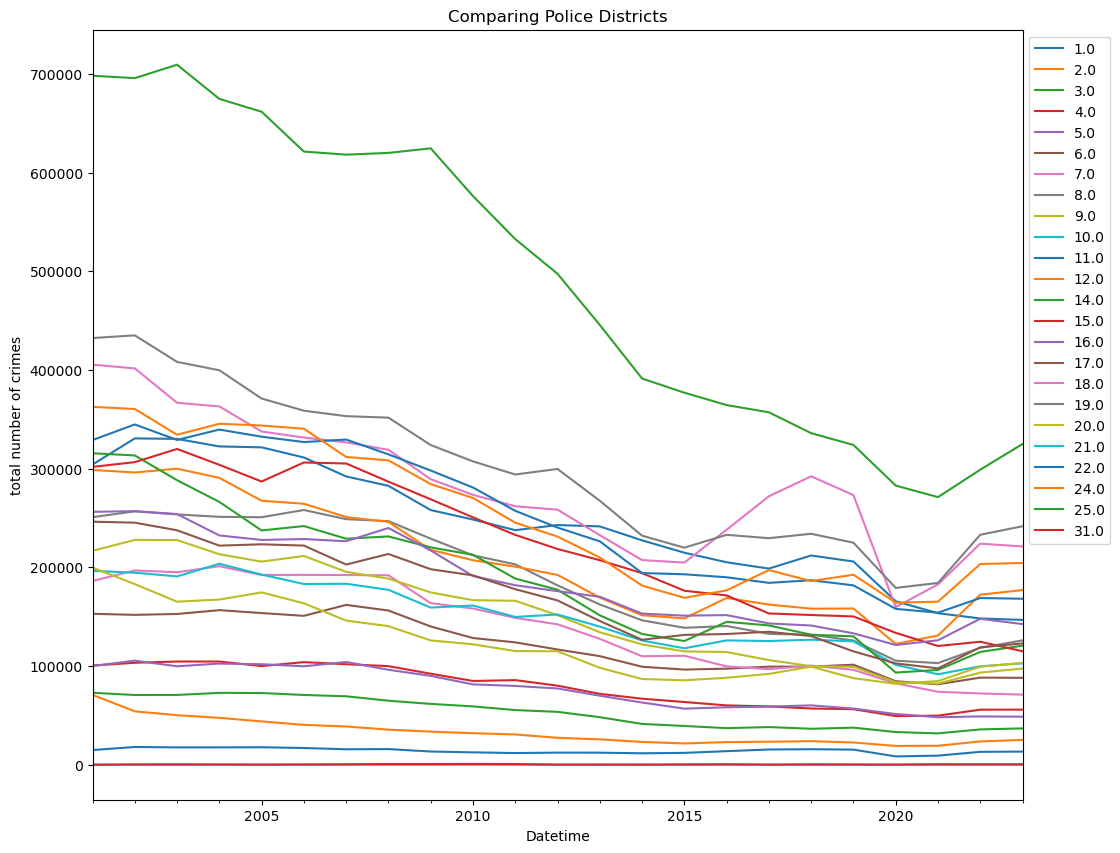

In [35]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Comparing Police Districts')
ax.set_ylabel('total number of crimes')
unstacked.plot(ax=ax)
ax.legend(bbox_to_anchor=[1,1]);

Police district 3 has the most crimes and Police district 31 has the least ones.

2) Crimes Across the Years:
Is the total number of crimes increasing or decreasing across the years?
Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

In [40]:
df_crimes = chicago_final.groupby("Primary Type").resample("Y").sum()
df_crimes

ID  Arrest  Domestic     Beat  \
Primary Type      Datetime                                              
ARSON             2001-12-31    1635830865     181        60  1247579   
                  2002-12-31    2288357434     156        72  1287303   
                  2003-12-31    2703076345     140        53  1128192   
                  2004-12-31    2646181864     109        37   992253   
                  2005-12-31    2850867321     121        40   843632   
...                                    ...     ...       ...      ...   
WEAPONS VIOLATION 2019-12-31   74471980828    4224        49  6100494   
                  2020-12-31  102154848702    5448        35  8108066   
                  2021-12-31  111493649779    5560        58  8995601   
                  2022-12-31  111909467040    5391        71  8729474   
                  2023-12-31  107169545891    4739        37  7947119   

                              District      Ward       Latitude      Longitude  
Primary Type      Datetime                                                      
ARSON             2001-12-31   11870.0     103.0   42047.307400  -88118.160187  
                  2002-12-31   12169.0   15924.0   40922.433732  -85752.010876  
                  2003-12-31   10627.0   19981.0   39863.754410  -83554.299139  
                  2004-12-31    9509.0   17373.0   32384.111791  -67867.324658  
                  2005-12-31    7930.0   15043.0   28785.106692  -60323.991343  
...                                ...       ...            ...            ...  
WEAPONS VIOLATION 2019-12-31   59551.0  122190.0  264977.937719 -555625.593886  
                  2020-12-31   79120.0  163744.0  351911.729617 -737889.451103  
                  2021-12-31   87874.0  180362.0  374011.308683 -784180.519071  
                  2022-12-31   85257.0  173211.0  363990.502060 -763122.776922  
                  2023-12-31   77540.0  155714.0  341647.172109 -716304.459848  

[754 rows x 8 columns]

In [41]:
df_crimes=df_crimes.drop(columns=['ID','Latitude','Longitude','District'])
df_crimes

Arrest  Domestic     Beat      Ward
Primary Type      Datetime                                       
ARSON             2001-12-31     181        60  1247579     103.0
                  2002-12-31     156        72  1287303   15924.0
                  2003-12-31     140        53  1128192   19981.0
                  2004-12-31     109        37   992253   17373.0
                  2005-12-31     121        40   843632   15043.0
...                              ...       ...      ...       ...
WEAPONS VIOLATION 2019-12-31    4224        49  6100494  122190.0
                  2020-12-31    5448        35  8108066  163744.0
                  2021-12-31    5560        58  8995601  180362.0
                  2022-12-31    5391        71  8729474  173211.0
                  2023-12-31    4739        37  7947119  155714.0

[754 rows x 4 columns]

In [43]:
df_crimes['Total'] = df_crimes.sum(axis=1)
df_crimes

Arrest  Domestic     Beat      Ward      Total
Primary Type      Datetime                                                  
ARSON             2001-12-31     181        60  1247579     103.0  1247923.0
                  2002-12-31     156        72  1287303   15924.0  1303455.0
                  2003-12-31     140        53  1128192   19981.0  1148366.0
                  2004-12-31     109        37   992253   17373.0  1009772.0
                  2005-12-31     121        40   843632   15043.0   858836.0
...                              ...       ...      ...       ...        ...
WEAPONS VIOLATION 2019-12-31    4224        49  6100494  122190.0  6226957.0
                  2020-12-31    5448        35  8108066  163744.0  8277293.0
                  2021-12-31    5560        58  8995601  180362.0  9181581.0
                  2022-12-31    5391        71  8729474  173211.0  8908147.0
                  2023-12-31    4739        37  7947119  155714.0  8107609.0

[754 rows x 5 columns]

In [44]:
unstacked1 = df_crimes['Total'].unstack(level=0)
unstacked1

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-12-31,1247923.0,36731941.0,107369729.0,32930198.0,1874.0,2033038.0,69510417.0,36046.0,16216875.0,19359912.0,...,37800742.0,7760130.0,7990.0,3346774.0,10351.0,22497889.0,2898454.0,249258.0,127373818.0,4872691.0
2002-12-31,1303455.0,36392725.0,108505120.0,33547511.0,0.0,2103134.0,69763907.0,29388.0,16865721.0,18739165.0,...,40954313.0,8941326.0,10543.0,3059329.0,1487.0,22280692.0,2823464.0,236598.0,129602691.0,4968735.0
2003-12-31,1148366.0,33737712.0,102350907.0,32520912.0,0.0,1857905.0,69343004.0,53251.0,17498957.0,18115405.0,...,38420623.0,8760709.0,8908.0,3137269.0,1152.0,21028878.0,2690959.0,281150.0,129879637.0,4948874.0
2004-12-31,1009772.0,33213385.0,100961299.0,31478765.0,0.0,1781414.0,66868221.0,45059.0,18612585.0,17783431.0,...,36864373.0,9569366.0,15605.0,3267483.0,441.0,19380615.0,2361780.0,261131.0,125489830.0,4997605.0
2005-12-31,858836.0,31472892.0,97770947.0,32422831.0,0.0,1794528.0,67717723.0,43364.0,19725749.0,18041188.0,...,35204449.0,8441261.0,5116.0,3535828.0,953.0,19190928.0,2409653.0,214849.0,111961567.0,4707286.0
2006-12-31,896445.0,30279247.0,93967170.0,30535693.0,0.0,1679968.0,70916097.0,55841.0,16991935.0,18245443.0,...,34443802.0,9050476.0,3738.0,3874501.0,8862.0,18554594.0,2043525.0,214232.0,112125075.0,4249707.0
2007-12-31,894649.0,30347888.0,92876861.0,30316970.0,0.0,1707541.0,66900511.0,62168.0,15886596.0,18632677.0,...,34021086.0,7510162.0,9380.0,4209324.0,2570.0,17414589.0,2014361.0,236760.0,110684962.0,3939292.0
2008-12-31,779442.0,29494082.0,89156442.0,31828394.0,0.0,1804882.0,65957476.0,65799.0,13769163.0,19610799.0,...,33229080.0,6324978.0,5744.0,3682050.0,0.0,19193218.0,1940396.0,225546.0,115957252.0,4192738.0
2009-12-31,765829.0,26699071.0,81350074.0,32359322.0,0.0,1629825.0,59636130.0,60445.0,12728873.0,18485179.0,...,32048438.0,4675210.0,12167.0,3784333.0,0.0,18819424.0,1624716.0,217480.0,107201099.0,4495542.0


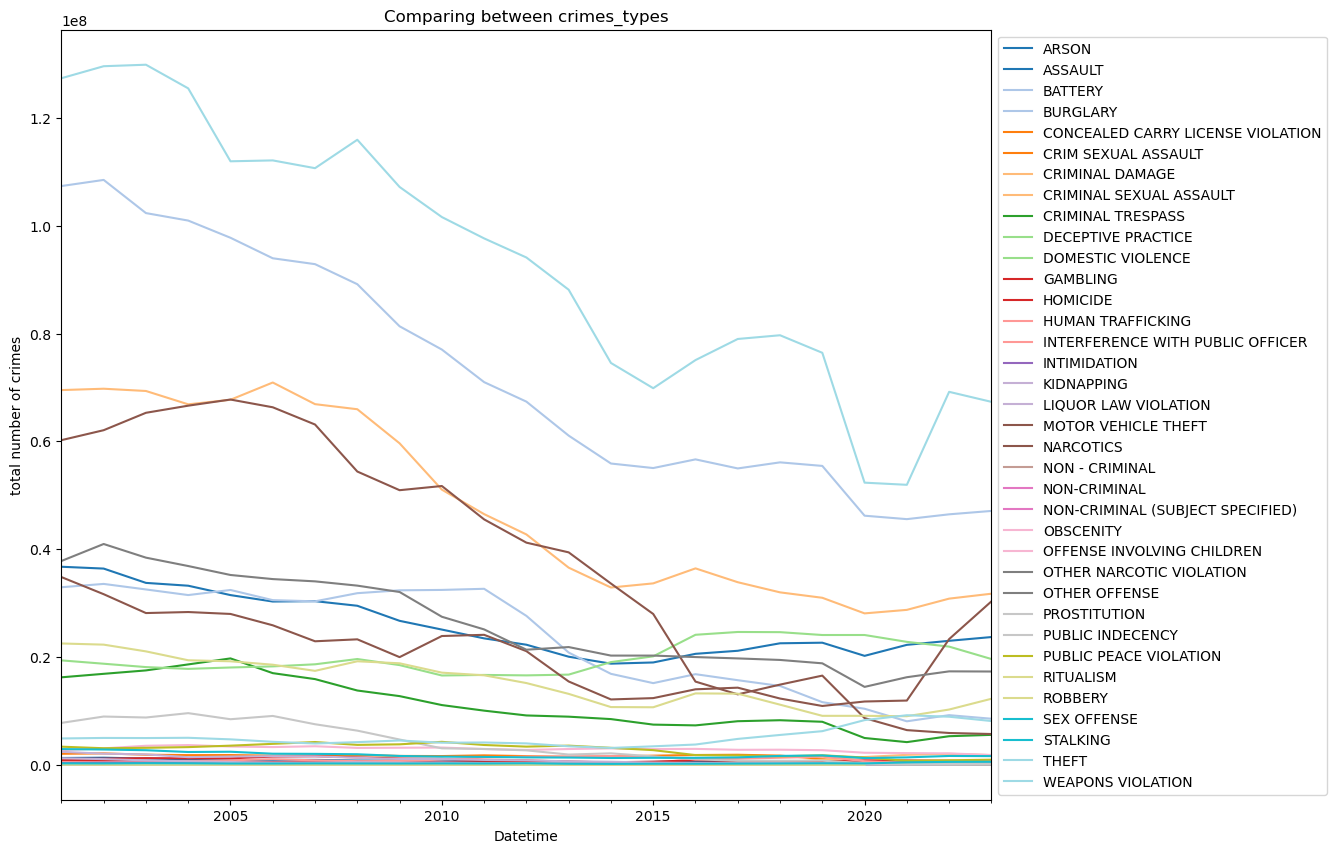

In [51]:
fig, ax = plt.subplots(figsize=(12,10))
ax.set_title('Comparing between crimes_types')
ax.set_ylabel('total number of crimes')
unstacked1.plot(ax=ax, colormap='tab20')
ax.legend(bbox_to_anchor=[1,1]);

 The total number of crimes is decreasing across the years, except for robbery, assault and motor vehicle theft that shows an increase starting from 2021.

3) Comparing AM vs. PM Rush Hour:
Are crimes more common during AM rush hour or PM rush hour?

You can consider any crime that occurred between 7 AM - 10 AM as AM rush hour

You can consider any crime that occurred between 4 -7 PM as PM rush hour.

What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush hour?

Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [95]:
chicago = chicago_full.drop(columns=drop_cols)
chicago

MemoryError: Unable to allocate 243. MiB for an array with shape (4, 7957253) and data type object

In [ ]:
chicago=chicago.drop(columns=['ID','Latitude','Longitude','District','Year','District','Location Description'])
chicago

In [ ]:
crimes_by_hour = chicago.groupby('Primary Type')['Date'].value_counts()
crimes_by_hour

In [ ]:
plot_df = crimes_by_hour.to_frame('# of Crimes').reset_index()
plot_df

In [85]:
plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5795358 entries, 0 to 5795357
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Primary Type  object
 1   Date          object
 2   # of Crimes   int64 
dtypes: int64(1), object(2)
memory usage: 132.6+ MB


In [86]:
plot_df[['date','time','AM/PM']] = plot_df['Date'].str.split(' ', expand=True)
plot_df

,Primary Type,Date,# of Crimes,date,time,AM/PM
0,ARSON,10/19/2010 01:00:00 AM,5,10/19/2010,01:00:00,AM
1,ARSON,03/15/2021 03:04:00 AM,3,03/15/2021,03:04:00,AM
2,ARSON,05/28/2014 05:05:00 AM,3,05/28/2014,05:05:00,AM
3,ARSON,05/30/2020 07:30:00 PM,3,05/30/2020,07:30:00,PM
4,ARSON,06/10/2014 04:13:00 AM,3,06/10/2014,04:13:00,AM
...,...,...,...,...,...,...
5795353,WEAPONS VIOLATION,12/31/2022 11:47:00 PM,1,12/31/2022,11:47:00,PM
5795354,WEAPONS VIOLATION,12/31/2022 11:55:00 PM,1,12/31/2022,11:55:00,PM
5795355,WEAPONS VIOLATION,12/31/2022 11:58:00 AM,1,12/31/2022,11:58:00,AM
5795356,WEAPONS VIOLATION,12/31/2022 12:00:00 AM,1,12/31/2022,12:00:00,AM


In [87]:
#plot_df['date'] = pd.to_datetime(plot_df['date'])

In [88]:
#plot_df['time'] = pd.to_datetime(plot_df['time'])

In [93]:
plot_df['datetime'] = plot_df.concat([plot_df['date'], plot_df['time']])
plot_df

AttributeError: 'DataFrame' object has no attribute 'concat'

In [91]:
plot_df = plot_df.set_index('date')
plot_df

,Primary Type,Date,# of Crimes,AM/PM
date,,,,
2010-10-19,ARSON,10/19/2010 01:00:00 AM,5,AM
2021-03-15,ARSON,03/15/2021 03:04:00 AM,3,AM
2014-05-28,ARSON,05/28/2014 05:05:00 AM,3,AM
2020-05-30,ARSON,05/30/2020 07:30:00 PM,3,PM
2014-06-10,ARSON,06/10/2014 04:13:00 AM,3,AM
...,...,...,...,...
2022-12-31,WEAPONS VIOLATION,12/31/2022 11:47:00 PM,1,PM
2022-12-31,WEAPONS VIOLATION,12/31/2022 11:55:00 PM,1,PM
2022-12-31,WEAPONS VIOLATION,12/31/2022 11:58:00 AM,1,AM


In [92]:
df_crimes_hours = plot_df.groupby("AM/PM").resample("H").sum()
df_crimes_hours

# of Crimes
AM/PM date                            
AM    2001-01-01 00:00:00         1044
      2001-01-01 01:00:00            0
      2001-01-01 02:00:00            0
      2001-01-01 03:00:00            0
      2001-01-01 04:00:00            0
...                                ...
PM    2023-12-06 20:00:00            0
      2023-12-06 21:00:00            0
      2023-12-06 22:00:00            0
      2023-12-06 23:00:00            0
      2023-12-07 00:00:00          377

[402026 rows x 1 columns]